Importing the required libraries

In [3]:
%matplotlib notebook
%matplotlib inline
import matplotlib.pyplot as plt #Libraries for visualization
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
import numpy as np #Library for numerical calculations
from scipy import stats #Library for statistical analysis 
from sklearn import datasets #Libraries for machine learning
from sklearn.naive_bayes import GaussianNB 
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import train_test_split


Import and load the glass.data dataset

after loading the dataset, we give the feature names list all the class names besides 'Type', and we give target_names the names of each different use of the glass that we can see in the glass.names file.

In [5]:
import numpy as np
import pandas as pd


url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/glass/glass.data'
header = ['id', 'RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe', 'Type']
glass = pd.read_csv(url, names=header)

X = glass.iloc[:, 1:-1].values 
y = glass.iloc[:, -1].values 

target_names = np.unique(y)
feature_names = list(glass.columns[1:-1])

target_names = ["building_windows_float_processed", "building_windows_non_float_processed", "vehicle_windows_float_processed", "vehicle_windows_non_float_processed", "containers", "tableware", "headlamps"]
number_of_features = X.shape[1]
number_of_classes = len(np.unique(y))

print("Number and names of classes:", len(np.unique(y)), target_names) 
print("Number and names of features:", X.shape[1], feature_names)
print("Number of data points:", X.shape[0])


Number and names of classes: 6 ['building_windows_float_processed', 'building_windows_non_float_processed', 'vehicle_windows_float_processed', 'vehicle_windows_non_float_processed', 'containers', 'tableware', 'headlamps']
Number and names of features: 9 ['RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe']
Number of data points: 214


## **Visualisations**

a few histograms and scatterplots depicting the glass dataset using different methods.

In [8]:
colors = ['blue', 'green', 'red', 'purple', 'orange', 'yellow', 'black']


Histogram depicting the data of all the features

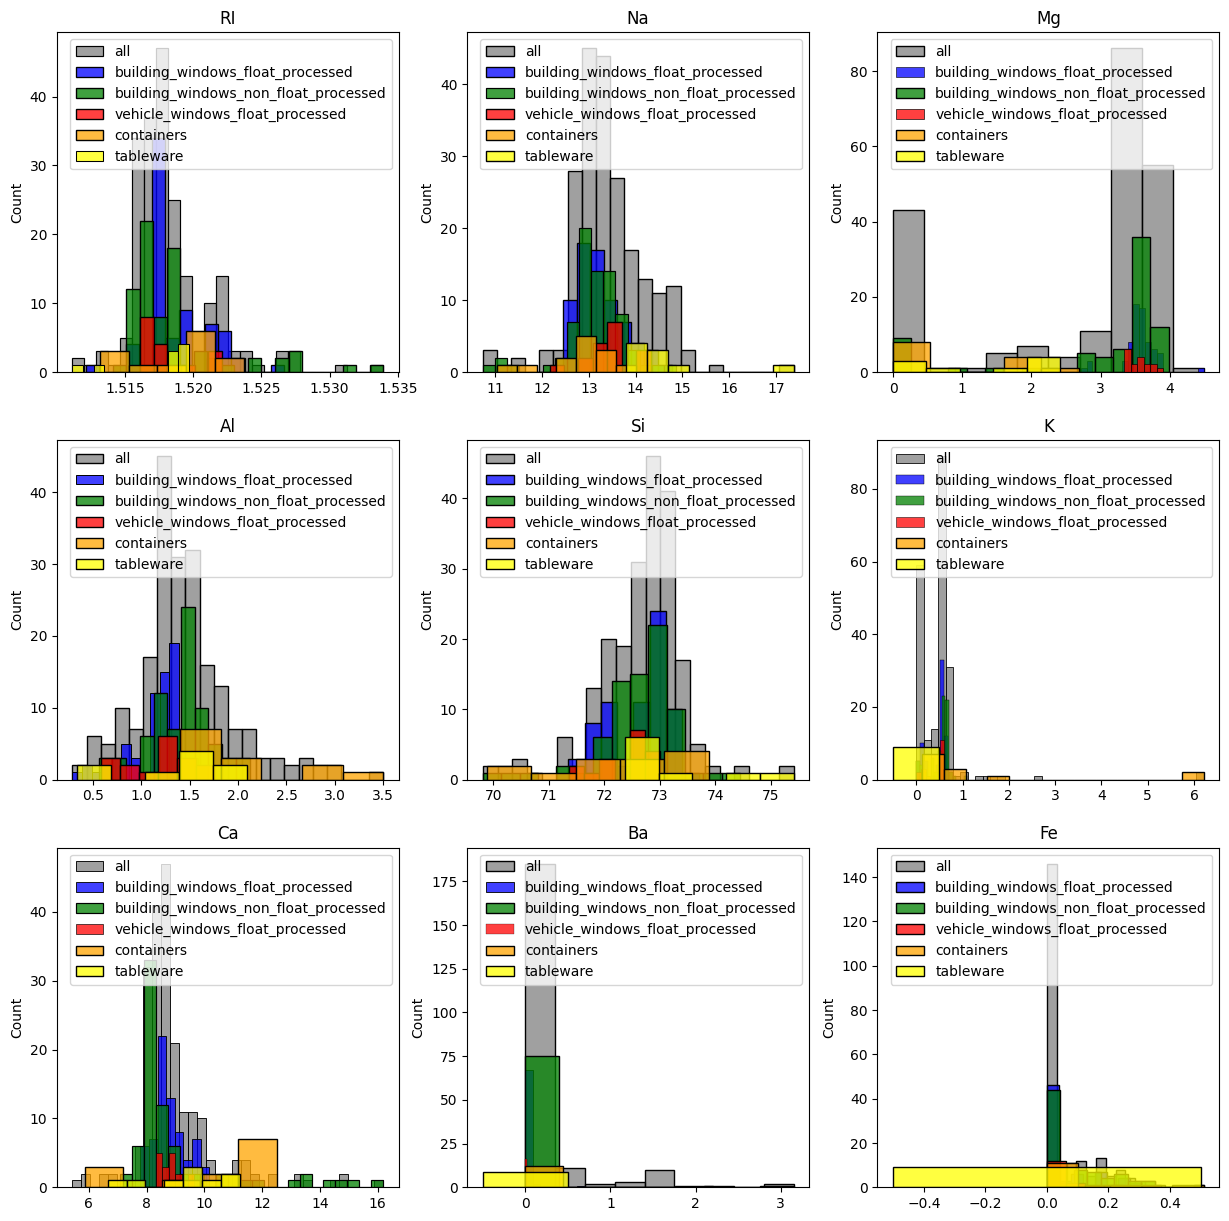

In [8]:
fig = plt.figure(figsize=(15, 15))
fig.subplots(nrows=3, ncols=3)

for feat_i in range(number_of_features):
    ax = plt.subplot(3,3, feat_i+1)
    plt.title(feature_names[feat_i]) 
    sns.histplot(X[:,feat_i], color='grey', label='all')
    for class_i in range(number_of_classes):
        sns.histplot(X[y == class_i+1,feat_i], color=colors[class_i], label=target_names[class_i]) # (X[y==c,i] means we get the i'th column of X where the class in the same row in y is equal to c
    plt.legend()

plt.show()

A scatterplot graph, depicting all the pairs of features.

C:\Users\gorgi\AppData\Local\Temp\ipykernel_4320\250866907.py:6: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  ax = plt.subplot(9, 9,X.shape[1]*feat_i + feat_j+1)


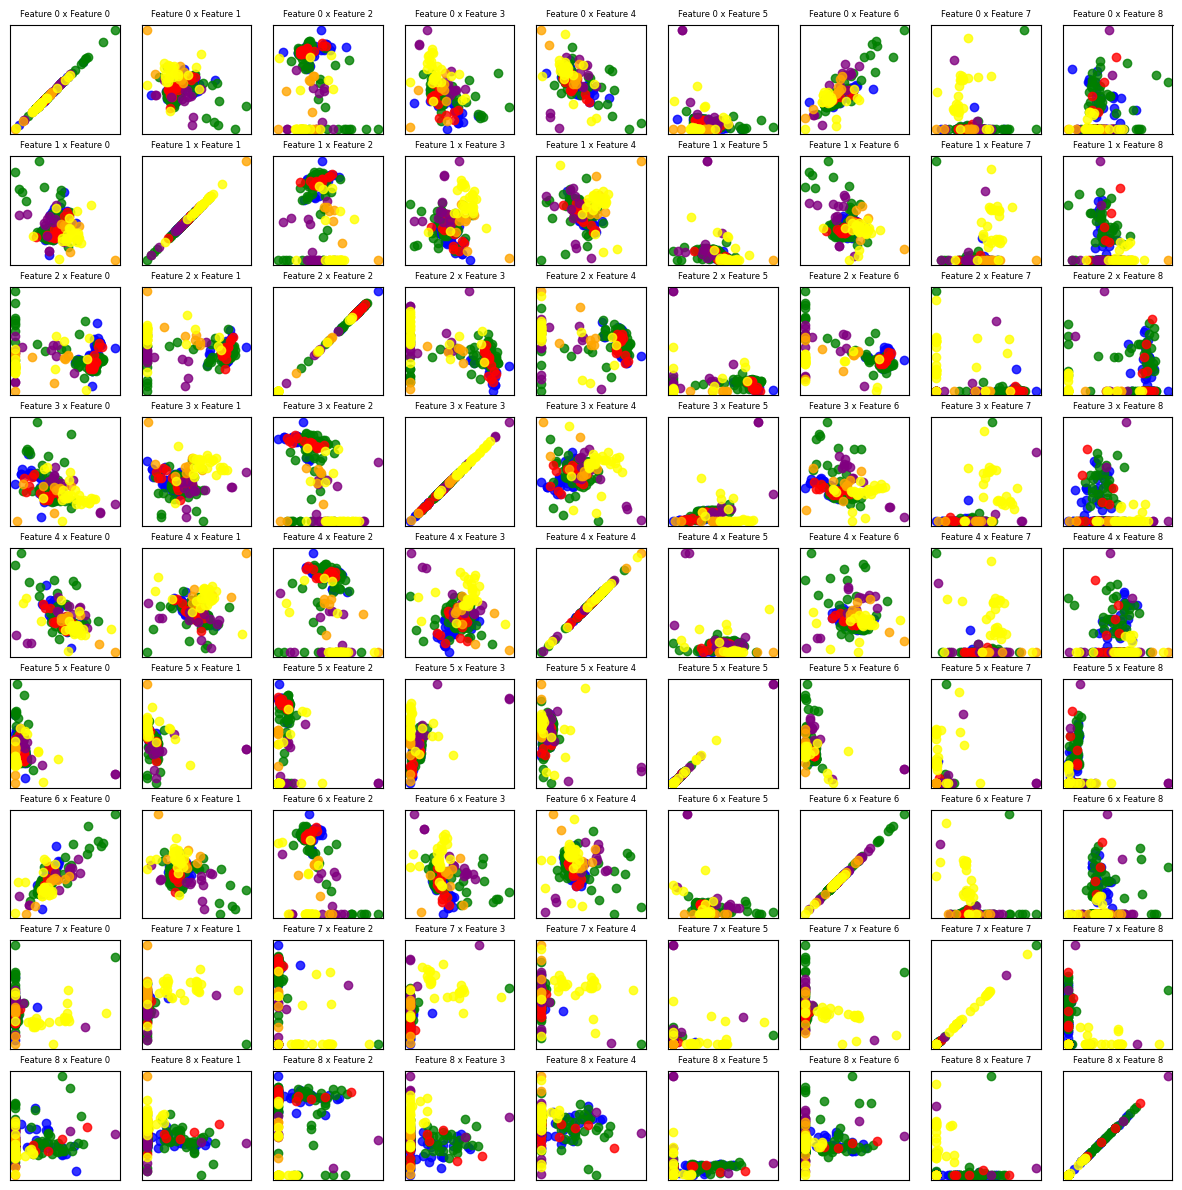

In [9]:
fig = plt.figure(figsize=(15, 15))
plt.title("Scatterplots of the Glass dataset features")
fig.subplots(nrows=9, ncols=9)
for feat_i in range(X.shape[1]):
    for feat_j in range(X.shape[1]):  
        ax = plt.subplot(9, 9,X.shape[1]*feat_i + feat_j+1)
        # Plot the points
        for color, i, target_name in zip(colors, np.unique(y), target_names):
            plt.scatter(X[y == i, feat_i], X[y == i, feat_j], alpha=.8, color=color, label=target_name) 
        plt.xticks(())
        plt.yticks(())
        plt.title("Feature "+str(feat_i)+" x Feature "+str(feat_j), fontsize=6)
plt.show()


Between feature dependence

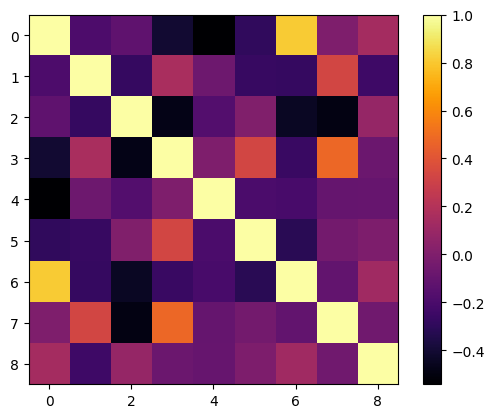

In [10]:
correlation_matrix = np.zeros((number_of_features,number_of_features))
for i in range(number_of_features): #We need a 4x4 matrix to represent the correlation matrix, where we set the value of Cij to be the correlation between the i'th and the j'th metric
    measure = X[:,i]
    for j in range(number_of_features):
        measure2 = X[:,j]
        corr, _ = stats.pearsonr(measure, measure2)
        correlation_matrix[i][j] = corr
plt.figure()
plt.imshow(correlation_matrix, cmap = "inferno") #We can draw the matrix using imshow
plt.colorbar()
plt.show()

## PCA

## Transforming the data into a 3 dimensional space for visualisation

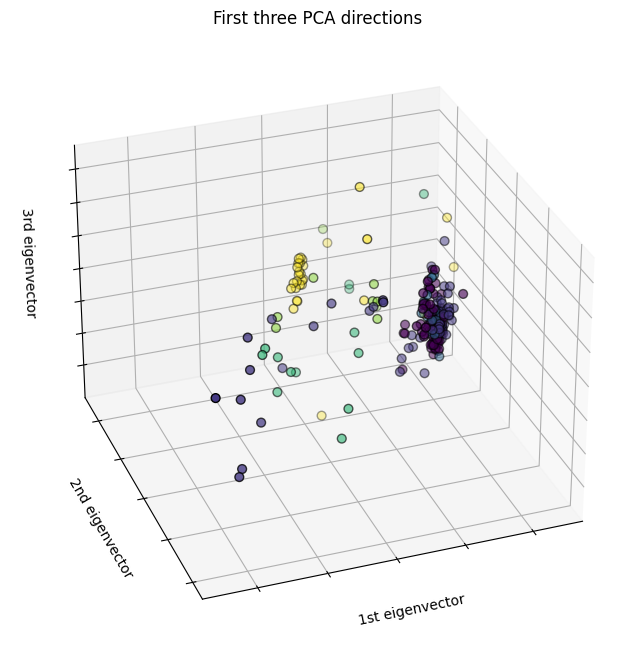

In [6]:
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection='3d', elev=-150, azim=110)

pca = PCA(n_components=6) 
X_reduced = pca.fit(X).transform(X) # Now we fit the PCA model to X with fit() and apply it to X immediately with transform() 
ax.scatter(X_reduced[:, 0], X_reduced[:, 1], X_reduced[:, 2], c=y, edgecolor='k', s=40)
ax.set_title("First three PCA directions")
ax.set_xlabel("1st eigenvector")
ax.set_ylabel("2nd eigenvector")
ax.set_zlabel("3rd eigenvector")
ax.xaxis.set_ticklabels([])
ax.yaxis.set_ticklabels([])
ax.zaxis.set_ticklabels([])
plt.show()


## PCA

## A 2 dimensional representation of the glass dataset

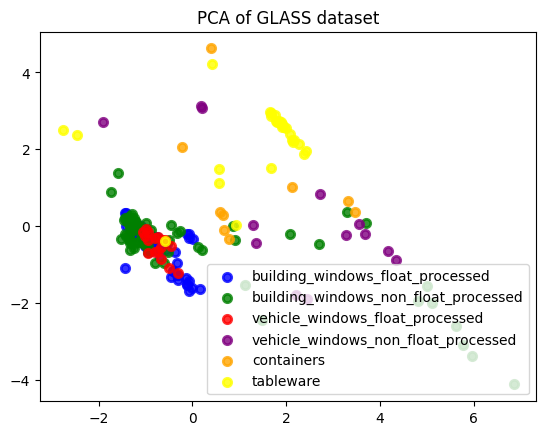

In [11]:
pca = PCA(n_components=5)
X_PCA = pca.fit(X).transform(X)

plt.figure() 
for color, i, target_name in zip(colors, np.unique(y), target_names):
    plt.scatter(X_PCA[y == i, 0], X_PCA[y == i, 1], color=color, alpha=.8, lw=2,
                label=target_name)
plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.title('PCA of GLASS dataset')
plt.show()

## LDA dimensionality reduction of the glass dataset

Text(0.5, 1.0, 'LDA of GLASS dataset')

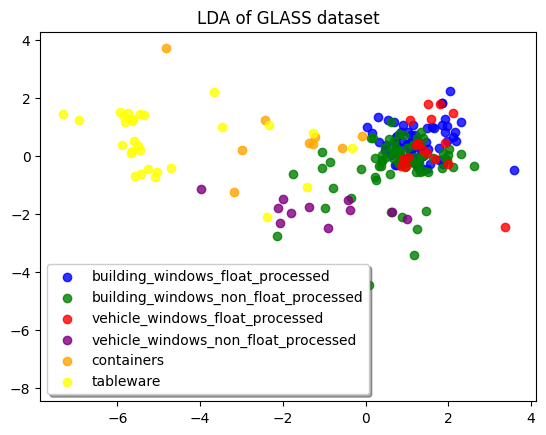

In [12]:
lda = LinearDiscriminantAnalysis(n_components=5)
X_LDA = lda.fit(X, y).transform(X) 
plt.figure()
for color, i, target_name in zip(colors, np.unique(y), target_names):
    plt.scatter(X_LDA[y == i, 0], X_LDA[y == i, 1], alpha=.8, color=color,label=target_name)
plt.legend(loc='best', shadow=True, scatterpoints=1)
plt.title('LDA of GLASS dataset')

## Classification

Splitting the data into train and test sets

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42) #We split the original dataset (we use a fixed random state such as 42 so we always split the data the same way)

X_PCA_train, X_PCA_test, y_PCA_train, y_PCA_test = train_test_split(X_PCA, y, test_size=0.30, random_state=42) #We split the PCA dimensionaly reducted dataset
X_LDA_train, X_LDA_test, y_LDA_train, y_LDA_test = train_test_split(X_LDA, y, test_size=0.30, random_state=42) #We split the LDA dimensionaly reducted dataset

Using an lda classificator to predict the accuracy of the glass dataset.

In [14]:
#LDA model
lda = LinearDiscriminantAnalysis() 
lda.fit(X_train, y_train)
y_pred = lda.predict(X_test) 
accuracy = np.round(np.sum(y_test == y_pred)/len(y_test),3)
print("LDA accuracy for the original GLASS dataset", accuracy) 


LDA accuracy for the original GLASS dataset 0.646


Using a Naive Bayes classificator to predict the accuracy of the glass dataset.

In [15]:
gnb = GaussianNB() 
gnb.fit(X_train, y_train)
y_pred = gnb.predict(X_test)
accuracy = np.round(np.sum(y_test == y_pred)/len(y_test),3)
print("Naive Bayes accuracy for the original GLASS dataset", accuracy)

Naive Bayes accuracy for the original GLASS dataset 0.308


## Classification on the PCA transformed dataset.

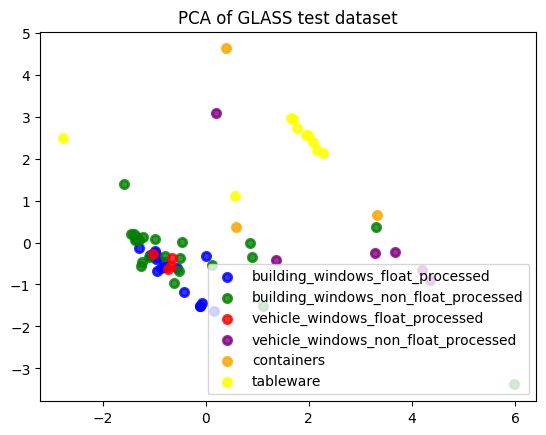

In [16]:
plt.figure() 
for color, i, target_name in zip(colors, np.unique(y), target_names):
    plt.scatter(X_PCA_test[y_PCA_test == i, 0], X_PCA_test[y_PCA_test == i, 1], color=color, alpha=.8, lw=2,
                label=target_name)
plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.title('PCA of GLASS test dataset')
plt.show()

LDA accuracy for the PCA dimensionaly reducted GLASS dataset 0.631


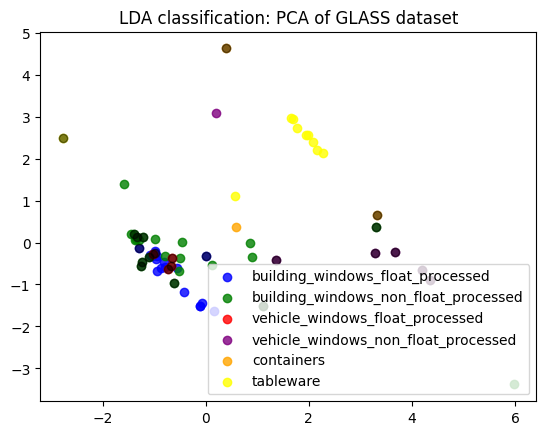

In [29]:
lda = LinearDiscriminantAnalysis()
lda.fit(X_PCA_train, y_PCA_train)
y_pred = lda.predict(X_PCA_test)
accuracy = np.round(np.sum(y_PCA_test == y_pred)/len(y_PCA_test),3)
print("LDA accuracy for the PCA dimensionaly reducted GLASS dataset", accuracy)

plt.figure() 
for color, i, target_name in zip(colors, np.unique(y), target_names):
    plt.scatter(X_PCA_test[y_PCA_test == i, 0], X_PCA_test[y_PCA_test == i, 1], alpha=.8, color=color,
                label=target_name)
plt.title('LDA classification: PCA of GLASS dataset')
 
incorrect = y_pred==y_PCA_test
for i in range(len(incorrect)):
    if(incorrect[i]==False):
        plt.scatter(X_PCA_test[i][0], X_PCA_test[i][1], alpha=.5, color="black")
plt.legend(loc='best', shadow=False, scatterpoints=1)

Naive Bayes accuracy for the PCA dimensionaly reducted GLASS dataset 0.6


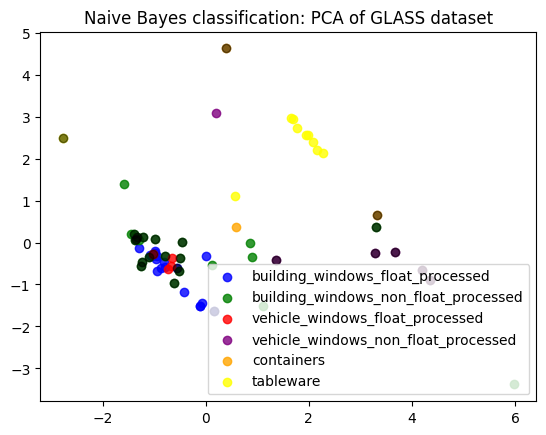

In [27]:
gnb = GaussianNB()
gnb.fit(X_PCA_train, y_PCA_train)
y_pred = gnb.predict(X_PCA_test)
print("Naive Bayes accuracy for the PCA dimensionaly reducted GLASS dataset", np.round(np.sum(y_PCA_test == y_pred)/len(y_PCA_test),3))


plt.figure()
for color, i, target_name in zip(colors, np.unique(y), target_names):
    plt.scatter(X_PCA_test[y_PCA_test == i, 0], X_PCA_test[y_PCA_test == i, 1], alpha=.8, color=color,
                label=target_name)
plt.title('Naive Bayes classification: PCA of GLASS dataset')

incorrect = y_pred!=y_PCA_test
for i in range(len(incorrect)):
    if(incorrect[i]==True):
        plt.scatter(X_PCA_test[i][0], X_PCA_test[i][1], alpha=.5, color="black")
plt.legend(loc='best', shadow=False, scatterpoints=1)

## Classifications on the LDA transformed dataset

LDA accuracy for the LDA dimensionaly reducted GLASS dataset 0.677


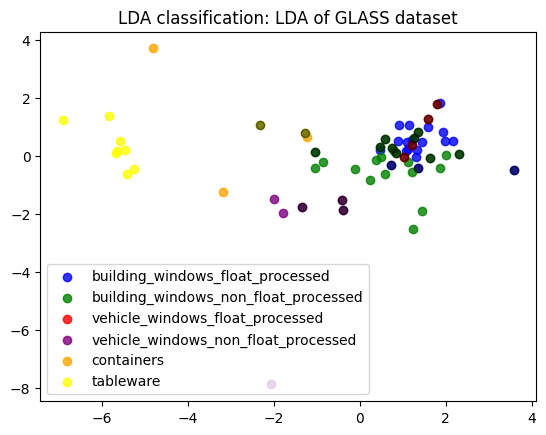

In [28]:
lda = LinearDiscriminantAnalysis(solver="svd", store_covariance=True)
lda.fit(X_LDA_train, y_LDA_train)
y_pred = lda.predict(X_LDA_test)
print("LDA accuracy for the LDA dimensionaly reducted GLASS dataset", np.round(np.sum(y_LDA_test == y_pred)/len(y_LDA_test),3))


plt.figure()
for color, i, target_name in zip(colors, np.unique(y), target_names):
    plt.scatter(X_LDA_test[y_LDA_test == i, 0], X_LDA_test[y_LDA_test == i, 1], alpha=.8, color=color,
                label=target_name)
plt.title('LDA classification: LDA of GLASS dataset')

incorrect = y_pred!=y_LDA_test
for i in range(len(incorrect)):
    if(incorrect[i]==True):
        plt.scatter(X_LDA_test[i][0], X_LDA_test[i][1], alpha=.5, color="black")
plt.legend(loc='best', shadow=False, scatterpoints=1)

Naive Bayes accuracy for the LDA dimensionaly reducted glass dataset 0.692


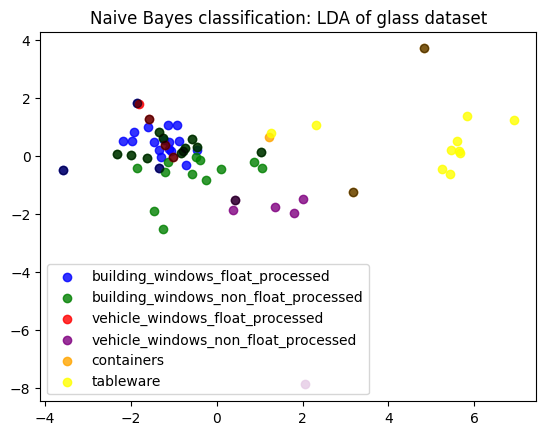

In [39]:
gnb = GaussianNB()
gnb.fit(X_LDA_train, y_LDA_train)
y_pred = gnb.predict(X_LDA_test)
print("Naive Bayes accuracy for the LDA dimensionaly reducted glass dataset", np.round(np.sum(y_LDA_test == y_pred)/len(y_LDA_test),3))

plt.figure()
for color, i, target_name in zip(colors, np.unique(y), target_names):
    plt.scatter(X_LDA_test[y_LDA_test == i, 0], X_LDA_test[y_LDA_test == i, 1], alpha=.8, color=color,
                label=target_name)
plt.title('Naive Bayes classification: LDA of glass dataset')

incorrect = y_pred!=y_LDA_test
for i in range(len(incorrect)):
    if(incorrect[i]==True):
        plt.scatter(X_LDA_test[i][0], X_LDA_test[i][1], alpha=.5, color="black")
plt.legend(loc='best', shadow=False, scatterpoints=1)

## QDA accuracy for the LDA dimensionaly reducted glass dataset

In [40]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

qda = QuadraticDiscriminantAnalysis()

qda.fit(X_LDA_train, y_LDA_train)

y_pred = qda.predict(X_LDA_test)

accuracy = np.round(np.sum(y_LDA_test == y_pred)/len(y_LDA_test), 3)

print(f"QDA accuracy for the LDA dimensionally reduced Glass dataset: {accuracy}")


QDA accuracy for the LDA dimensionally reduced Glass dataset: 0.646


## QDA Classifier on the GLASS dataset

In [22]:
from sklearn.datasets import make_classification
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

qda = QuadraticDiscriminantAnalysis()

qda.fit(X_train, y_train)

y_pred = qda.predict(X_test)


accuracy = accuracy_score(y_test, y_pred)

print(f"QDA Accuracy on the original glass dataset: {accuracy}")


QDA Accuracy on the original glass dataset: 0.5348837209302325


C:\Users\gorgi\AppData\Roaming\Python\Python310\site-packages\sklearn\discriminant_analysis.py:935: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


## QDA Scatterplot of the GLASS dataset

C:\Users\gorgi\AppData\Roaming\Python\Python310\site-packages\sklearn\discriminant_analysis.py:935: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
C:\Users\gorgi\AppData\Roaming\Python\Python310\site-packages\sklearn\discriminant_analysis.py:960: RuntimeWarning: divide by zero encountered in power
  X2 = np.dot(Xm, R * (S ** (-0.5)))
C:\Users\gorgi\AppData\Roaming\Python\Python310\site-packages\sklearn\discriminant_analysis.py:960: RuntimeWarning: invalid value encountered in multiply
  X2 = np.dot(Xm, R * (S ** (-0.5)))
C:\Users\gorgi\AppData\Roaming\Python\Python310\site-packages\sklearn\discriminant_analysis.py:963: RuntimeWarning: divide by zero encountered in log
  u = np.asarray([np.sum(np.log(s)) for s in self.scalings_])


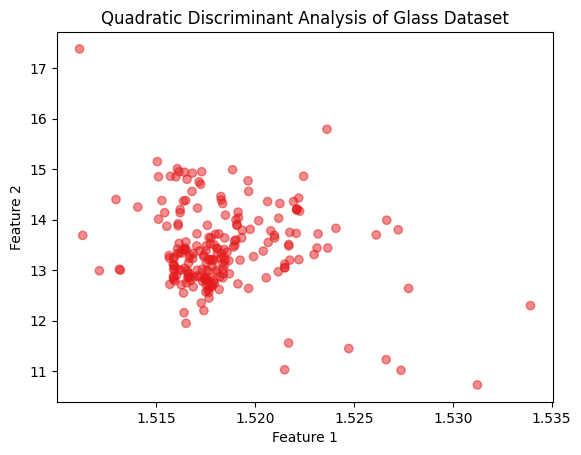

In [42]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
import matplotlib.pyplot as plt

# Define the model
qda = QuadraticDiscriminantAnalysis()

# Fit the model to the data
X_QDA = qda.fit(X, y).predict(X)

plt.scatter(X[:, 0], X[:, 1], c=X_QDA, cmap=plt.cm.Set1, alpha=0.5)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Quadratic Discriminant Analysis of Glass Dataset')
plt.show()


Playing with Priors

LDA accuracy for the PCA dimensionaly reducted glass dataset 0.569


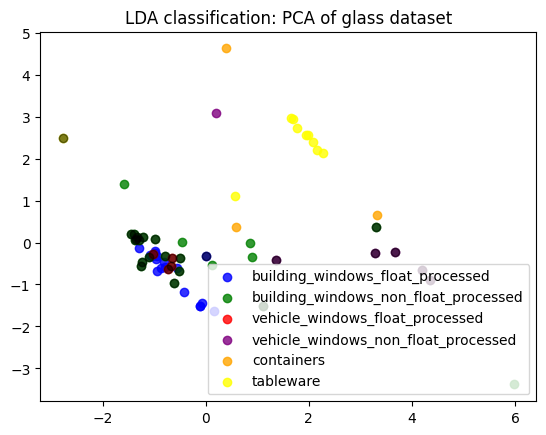

In [24]:
lda = LinearDiscriminantAnalysis(priors = [0.3,0.2,0.1,0.1,0.1,0.2])
lda.fit(X_PCA_train, y_PCA_train)
y_pred = lda.predict(X_PCA_test)
print("LDA accuracy for the PCA dimensionaly reducted glass dataset", np.round(np.sum(y_PCA_test == y_pred)/len(y_PCA_test),3))

plt.figure()
for color, i, target_name in zip(colors, np.unique(y), target_names):
    plt.scatter(X_PCA_test[y_PCA_test == i, 0], X_PCA_test[y_PCA_test == i, 1], alpha=.8, color=color,
                label=target_name)
plt.title('LDA classification: PCA of glass dataset')

incorrect = y_pred!=y_PCA_test
for i in range(len(incorrect)):
    if(incorrect[i]==True):
        plt.scatter(X_PCA_test[i][0], X_PCA_test[i][1], alpha=.5, color="black")
plt.legend(loc='best', shadow=False, scatterpoints=1)

To conclude which classifier is the best to use on the glass dataset, i would have to say it's LDA simply because it grants the highest accuracy out of all of the others.